## CRTBP Sun-Earth system dynamics simulation 

We introduce in this notebook a Python dynamics simulation of the Sun-Earth system's circular restricted three-body problem (CRTBP).

 - Free dynamics simulation (equations of motion)
 - Spacecraft's ephemeris retrieval  
 - Orbit visualization in both rotating and inertial frames
 - Sun-Earth L2 halo orbit construction
 

Required libraries: NumPy, SciPy, Matplotlib

### Free dynamics simulation (without propulsion)

We consider the restricted three-body problem of the Sun-Earth system. 

The movements of the Sun and the Earth are assumed to be planar and circular around the barycenter of the Sun-Earth system.

The spacecraft's equations of motion in the normalized non-dimensional form relative to the rotating barycentric frame are

\begin{equation}
\begin{bmatrix}
\dot{x} \\[.8em]
\dot{y} \\[.8em]
\dot{z} \\[.8em]
\ddot{x} \\[.8em]
\ddot{y} \\[.8em]
\ddot{z} 
\end{bmatrix} =
\begin{bmatrix}\label{eq:em}
v_x \\[.2em]
v_y \\[.2em]
v_z \\[.2em]
x + 2 v_y - \cfrac{(1-\mu)(x+\mu)}{r_1^3} - \cfrac{\mu(x+\mu -1 )}{r_2^3}  \\[-.2em]
y - 2 v_x - \cfrac{(1 - \mu)y}{r_1^3} - \cfrac{\mu y}{r_2^3}  \\[-.2em]
- \cfrac{(1 - \mu)z}{r_1^3} - \cfrac{\mu z}{r_2^3} 
\end{bmatrix}
\end{equation}

$\mu = \cfrac{m_{Earth}}{m_{Sun}+m_{Earth}}= 3.04036\cdot10^{-6}$ is called the fundamental parameter of the Sun-Earth system 

In [1]:
# Importing required computing packages
import numpy as np
from scipy.integrate import odeint

# Importing required plotting packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Defining the CRTBP dynamics function
def free_dynamics(X, t):
    
    # The spacecraft's state vector X = [position velocity] at time t
    x, y, z, xdot, ydot, zdot = X
    
    # Sun-spacecraft distance
    r1 = np.sqrt((x     + mu)**2 + y**2 + z**2)
    # Earth-spacecraft distance
    r2 = np.sqrt((x - 1.+ mu)**2 + y**2 + z**2)
    
    # CRTBP normalized equations of motion in the rotating frame (already demonstrated) 
    xddot  = x + 2.*ydot - (1.-mu)*(x + mu)/r1**3 - mu*(x -1.+mu)/r2**3

    yddot  = -2.*xdot + y*(1.-(1.-mu)/r1**3 - mu/r2**3)

    zddot  = -z*((1.-mu)/r1**3 + mu/r2**3)
    
    # Returning the state's derivitive X' = [velocity acceleration]
    return np.array([xdot, ydot, zdot, xddot, yddot, zddot])

In [3]:
# Sun-Earth fundamental constant 
mu = 3.04036*10**(-6) 

# State initial condition
X0 = np.array([-0.8, 0.4, 0.2, 0, 0, 0])

# Time interval of the simulation
Tmax = 8
N = 100*Tmax+1
t = np.linspace(0.0, Tmax, N)

# Solving the equations of motion
X = odeint(free_dynamics, X0, t)

In [4]:
# Retrieving ephemeris
def ephem(X, t):
    i_eph = int(t*(N-1)/Tmax)
    
    # Retrieving the state vector at time t
    X_eph = X.T[:,i_eph]
    
    # Returning the position and velocity
    return X_eph[:3], X_eph[3:]

In [5]:
t_eph = 5

r_eph, v_eph = ephem(X, t_eph)

print('The position vector at time', t_eph,'is r =', r_eph)
print('The velocity vector at time', t_eph,'is v =', v_eph)

The position vector at time 5 is r = [ 0.38301961 -0.61142042  0.04145844]
The velocity vector at time 5 is v = [ 0.16910345  0.45965962 -0.25683845]


#### Visualizing the computed free trajectory (orbit) in the rotating frame


The motion of the spacecraft will be visualized relative to the normalized rotating frame. 

The Sun's and Earth's positions in the frame are $(- \mu, 0, 0)$ 
and $(1 - \mu, 0, 0)$, respectively.

<img src="https://www.researchgate.net/profile/Matteo_Ceriotti/publication/245584911/figure/fig2/AS:667808262279168@1536229305054/The-restricted-three-body-problem.png" width="400" height="500"> 

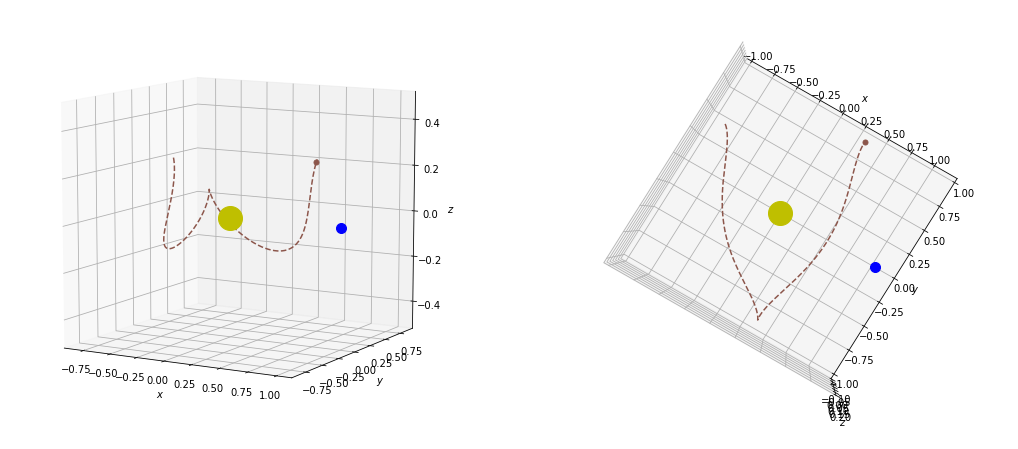

In [6]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[18, 8])

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')
x,  y,  z  = X.T[:3]
ax.plot(x, y, z, '--C5', label='Engin spatial')
ax.set_zlim(-0.5, 0.5)
ax.plot([x[len(x)-1]], [y[len(y)-1]], [z[len(z)-1]], 'oC5', markersize=5)
# Plotting the Sun and the Earth 
ax.plot([ -mu], [0], [0], 'oy', markersize=24, label='Soleil')
ax.plot([1-mu], [0], [0], 'ob', markersize=10, label='Terre')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(10,-60)
#ax.legend()
## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(x, y, z, '--C5')
ax2.plot([x[len(x)-1]], [y[len(y)-1]], [z[len(z)-1]], 'oC5', markersize=5)
# Plotting the Sun and the Earth 
ax2.plot([ -mu], [0], [0], 'oy', markersize=24)
ax2.plot([1-mu], [0], [0], 'ob', markersize=10)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_zlabel('$z$')
ax2.set_xlim(-1, 1.2)
ax2.set_ylim(-1, 1)
ax2.view_init(90)

fig.savefig('rotating.png')


#### Plotting the graphs of the position vector components $x$, $y$ and $z$ 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


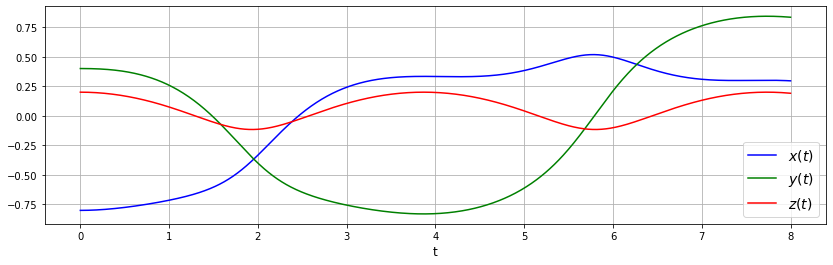

In [15]:
# Plotting the spacecraft's position components relative to the rotating frame
fig = plt.figure(figsize=[14, 4])
plt.plot(t, X[:, 0], 'b', label='$x(t)$')
plt.plot(t, X[:, 1], 'g', label='$y(t)$')
plt.plot(t, X[:, 2], 'r', label='$z(t)$')
plt.legend(loc='best',fontsize=14)
plt.xlabel('t', fontsize=12)
plt.grid()
plt.savefig('position1.eps')
plt.show()


#### Plotting the graphs of the velocity vector components $v_x$, $v_y$ and $v_z$

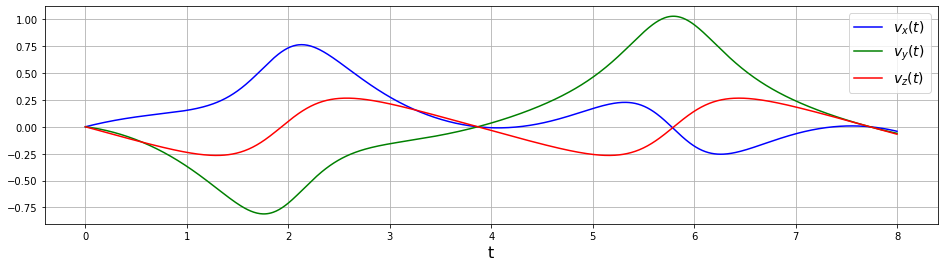

In [66]:
# Plotting the spacecraft's velocity components relative to the rotating frame
fig = plt.figure(figsize=[16, 4])
plt.plot(t, X[:, 3], 'b', label='$v_x(t)$')
plt.plot(t, X[:, 4], 'g', label='$v_y(t)$')
plt.plot(t, X[:, 5], 'r', label='$v_z(t)$')
plt.legend(loc='best',fontsize=14)
plt.xlabel('t', fontsize=16)
plt.grid()
plt.savefig('vitesse1.png')
plt.show()


#### Frame transformation R from rotating frame to inertial frame
\begin{equation}
\begin{bmatrix}
x_i \\[.3em]
y_i \\[.3em]
z_i
\end{bmatrix}
= 
R
\begin{bmatrix}
x \\[.3em]
y \\[.3em]
z
\end{bmatrix}
\end{equation}
Where
\begin{equation}
R = \begin{bmatrix}
\cos(t) & -\sin(t) & 0 \\[.3em]
\sin(t) & \cos(t) & 0 \\[.3em]
0 & 0 & 1
\end{bmatrix}
\end{equation}

In [8]:
def rot_to_inert(X, t):
    X_r =[]
    Y_r =[]
    Z_r =[]
    n= len(t)
    j=0
    for i in t:    
        x_r = np.cos(i)*X[j,0] - np.sin(i)*X[j,1]
        y_r = np.sin(i)*X[j,0] + np.cos(i)*X[j,1]
        z_r = X[j,2]
        X_r.append(x_r)
        Y_r.append(y_r)
        Z_r.append(z_r)
        j+=1
    x, y, z = np.array(X_r), np.array(Y_r), np.array(Z_r)
    return x, y, z

#### Visualizing the computed free trajectory (orbit) in the inertial frame

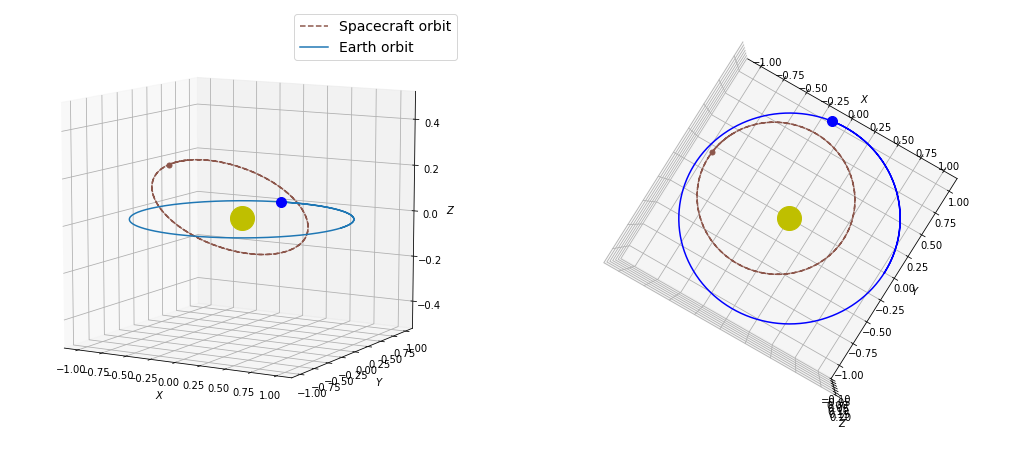

In [9]:
# Plotting the relative motion of the spacecraft
fig = plt.figure(figsize=[18, 8])

xi, yi, zi = rot_to_inert(X, t)
xe, ye, ze = (1-mu)*np.cos(t), (1-mu)*np.sin(t), 0

## Front view  
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Plotting the spacecraft's trajectory
ax.plot(xi, yi, zi, '--C5', label='Spacecraft orbit')
xo, yo, zo = xi[len(xi)-1], yi[len(yi)-1], zi[len(zi)-1]
ax.plot([xo], [yo], [zo], 'oC5', markersize=5)
# Plotting the Earth and its orbit
ax.plot(xe, ye, ze, label='Earth orbit')
xeo, yeo, zeo = xe[len(t)-1], ye[len(t)-1], ze
ax.plot([xeo], [yeo], [zeo], 'ob', markersize=10)
# Plotting the Sun 
ax.plot([ -mu], [0], [0], 'oy', markersize=24)
ax.set_zlim(-0.5, 0.5)
ax.legend(fontsize=14)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.view_init(10,-60)
## Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Plotting the spacecraft's trajectory
ax2.plot(xi, yi, zi, '--C5')
ax2.plot([xo], [yo], [zo], 'oC5', markersize=5)
# Plotting the Earth and its orbit
ax2.plot(xe, ye, ze, 'b')
ax2.plot([xeo], [yeo], [zeo], 'ob', markersize=10)
# Plotting the Sun
ax2.plot([ -mu], [0], [0], 'oy', markersize=24)
ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_zlabel('$Z$')
ax2.view_init(90)
fig.savefig('inertial.png')


#### Plotting the graphs of the position vector components $x_i$, $y_i$ and $z_i$ 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


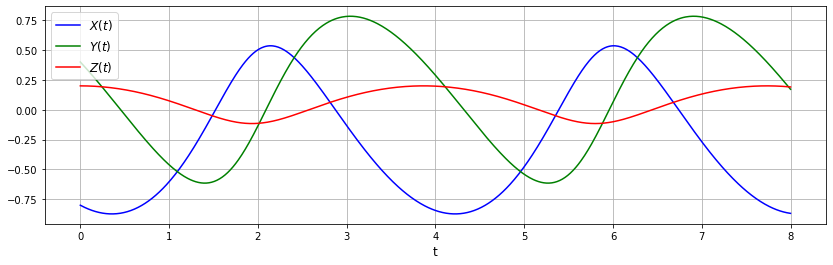

In [14]:
# Plotting the spacecraft's position components relative to the inertial frame
fig = plt.figure(figsize=[14, 4])
plt.plot(t, xi, 'b', label='$X(t)$')
plt.plot(t, yi, 'g', label='$Y(t)$')
plt.plot(t, zi, 'r', label='$Z(t)$')
plt.legend(loc='best',fontsize=12)
plt.xlabel('t', fontsize=12)
plt.grid()
plt.savefig('position2.eps')
plt.show()

### Sun-Earth L2 Lagrange point Halo orbit computation

The work of this part is  from the article "Three-Dimensional, Periodic 'Halo' Orbits", Kathleen Connor Howell, Celestial Mechanics 32 (1984) 53-71 

The main idea behind computing of the halo orbit and its initial condition is to assume that
$y_0 = \dot{x}_0 = \dot{z}_0 = 0 $ 

\begin{equation}
X_0 = \begin{bmatrix} x_0 & 0 & z_0 & 0 & \dot{y}_0 & 0\end{bmatrix}^T
\end{equation}

Several initial conditions have been computed for $\mu = 0.04$ (details in the article), we chose the following to construct our orbit

\begin{equation}
\begin{cases}
x_0 =& 1.220839 \\[.1em] 
z_0 =& 0.200987 \\[.1em] 
\dot{y}_0 =& -0.310434
\end{cases}
\end{equation}

In [7]:
# The assumed fundamental parameter 
mu = 0.04

# The halo orbit's initial state condition 
X0 = np.array([1.220839, 0, 0.200987, 0, -0.310434, 0])

# The halo orbit's half period
Thalf0 = 1.700458

# The halo orbit's period
T0 = 2.0*Thalf0

# The orbit simulation time interval
N_half  = 200
t = T0 * np.linspace(0.0, 1.0, 2*N_half+1) 

# Constructing the orbit
X = odeint(free_dynamics, X0, t)

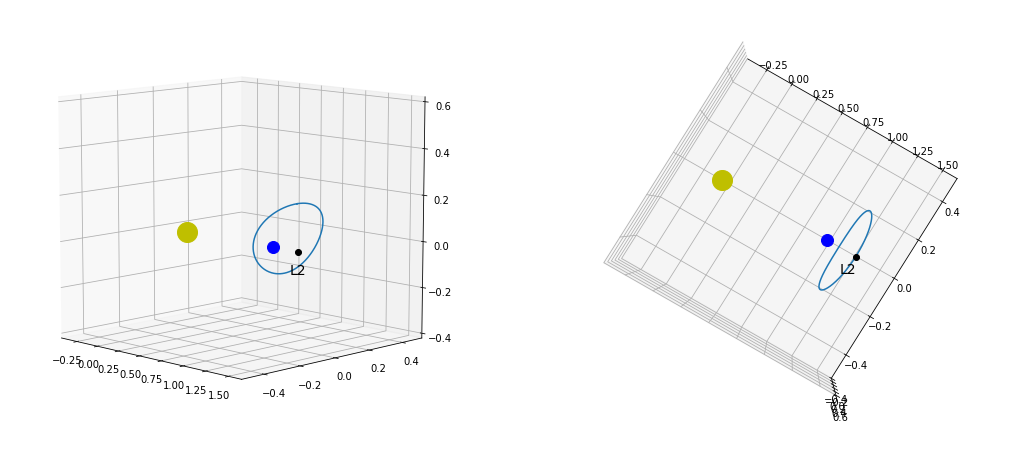

In [15]:
# The orbit visualization
fig = plt.figure(figsize=[18, 8])

# Front view
ax = fig.add_subplot(1, 2, 1, projection='3d')

x,  y,  z  = X.T[:3]
ax.plot(x, y, z)
xL2 = 1+(mu/3)**(1/3)
ax.plot([ -mu], [0], [0], 'oy', markersize=20)
ax.plot([1-mu], [0], [0], 'ob', markersize=12)
ax.plot([xL2], [0], [0], 'ok', markersize=6)

ax.set_xlim(-0.4, 1.6)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.4, 0.60)
ax.text(xL2, 0, -0.1, "L2", fontsize=14, horizontalalignment='center')
ax.view_init(10, -45)
# Top view
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax2.plot(x, y, z)
ax2.plot([ -mu], [0], [0], 'oy', markersize=20)
ax2.plot([1-mu], [0], [0], 'ob', markersize=12)
ax2.plot([xL2], [0], [0], 'ok', markersize=6)

ax2.set_xlim(-0.4, 1.6)
ax2.set_ylim(-0.5, 0.5)
ax2.set_zlim(-0.4, 0.60)
ax2.text(xL2+0.02, -0.08, 0, "L2", fontsize=14, horizontalalignment='center')
ax2.view_init(90)

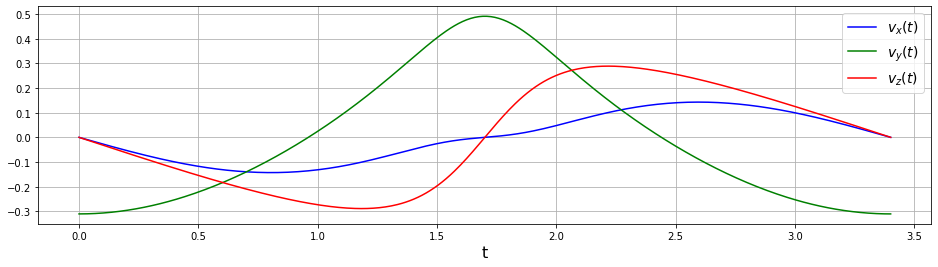

In [222]:
# Velocity components on halo orbit 
fig = plt.figure(figsize=[16, 4])
plt.plot(t, X[:, 3], 'b', label='$v_x(t)$')
plt.plot(t, X[:, 4], 'g', label='$v_y(t)$')
plt.plot(t, X[:, 5], 'r', label='$v_z(t)$')
plt.legend(loc='best',fontsize=14)
plt.xlabel('t', fontsize=16)
plt.grid()
plt.show()